In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the BLS API key
from api_keys import BLS_key



In [3]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2003", "endyear":"2012"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data03_12 = json.loads(p.text)



json_data03_12

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 228,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14000000',
    'data': [{'year': '2012',
      'period': 'M12',
      'periodName': 'December',
      'value': '7.9',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M11',
      'periodName': 'November',
      'value': '7.7',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M10',
      'periodName': 'October',
      'value': '7.8',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M09',
      'periodName': 'September',
      'value': '7.8',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M08',
      'periodName': 'August',
      'value': '8.1',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M07',
      'periodName': 'July',
      'value': '8.2',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M06',
      'periodName': 'June',
      'value': '8.2',
      'footnotes': [{}]},
     

In [4]:
json03_12_df = pd.DataFrame(json_data03_12['Results']['series'][0]['data'])
json03_12_df.head()

,year,period,periodName,value,footnotes
0,2012,M12,December,7.9,[{}]
1,2012,M11,November,7.7,[{}]
2,2012,M10,October,7.8,[{}]
3,2012,M09,September,7.8,[{}]
4,2012,M08,August,8.1,[{}]


In [5]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2013", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data13_22 = json.loads(p.text)
json_data13_22


{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 307,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14000000',
    'data': [{'year': '2022',
      'period': 'M12',
      'periodName': 'December',
      'value': '3.5',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M11',
      'periodName': 'November',
      'value': '3.6',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M10',
      'periodName': 'October',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M09',
      'periodName': 'September',
      'value': '3.5',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M08',
      'periodName': 'August',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M07',
      'periodName': 'July',
      'value': '3.5',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M06',
      'periodName': 'June',
      'value': '3.6',
      'footnotes': [{}]},
     

In [6]:
json13_22_df = pd.DataFrame(json_data13_22['Results']['series'][0]['data'])

In [7]:

merged_df = pd.concat([json03_12_df, json13_22_df])
print(merged_df)

     year period periodName value footnotes
0    2012    M12   December   7.9      [{}]
1    2012    M11   November   7.7      [{}]
2    2012    M10    October   7.8      [{}]
3    2012    M09  September   7.8      [{}]
4    2012    M08     August   8.1      [{}]
..    ...    ...        ...   ...       ...
115  2013    M05        May   7.5      [{}]
116  2013    M04      April   7.6      [{}]
117  2013    M03      March   7.5      [{}]
118  2013    M02   February   7.7      [{}]
119  2013    M01    January   8.0      [{}]

[240 rows x 5 columns]


In [8]:
Merged_df = merged_df.rename(columns={'periodName' : 'Month'})
merged_df['value'] = merged_df['value'].astype(float)
print (merged_df)

     year period periodName  value footnotes
0    2012    M12   December    7.9      [{}]
1    2012    M11   November    7.7      [{}]
2    2012    M10    October    7.8      [{}]
3    2012    M09  September    7.8      [{}]
4    2012    M08     August    8.1      [{}]
..    ...    ...        ...    ...       ...
115  2013    M05        May    7.5      [{}]
116  2013    M04      April    7.6      [{}]
117  2013    M03      March    7.5      [{}]
118  2013    M02   February    7.7      [{}]
119  2013    M01    January    8.0      [{}]

[240 rows x 5 columns]


Text(0.5, 1.0, 'Unemployment Level from 2003 - 2022')

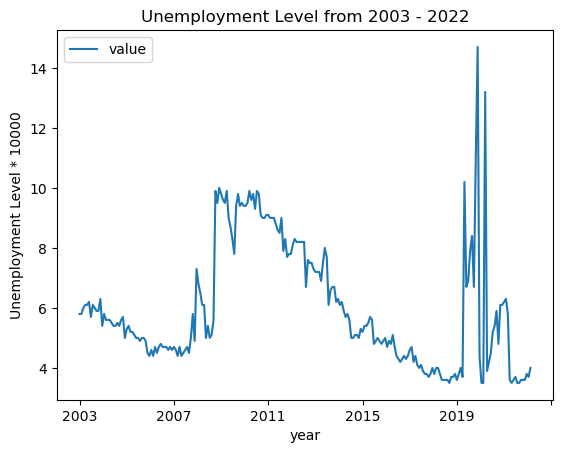

In [9]:
merged_df = merged_df.sort_values(by = 'year', ascending= True)
merged_df.plot(x = 'year', y = 'value')
plt.xlabel('year')
plt.ylabel('Unemployment Level * 10000')
plt.title('Unemployment Level from 2003 - 2022')


In [10]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0'],"startyear":"2003", "endyear":"2012"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data03_12c = json.loads(p.text)



json_data03_12c

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 282,
 'message': [],
 'Results': {'series': [{'seriesID': 'CUUR0000SA0',
    'data': [{'year': '2012',
      'period': 'M12',
      'periodName': 'December',
      'value': '229.601',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M11',
      'periodName': 'November',
      'value': '230.221',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M10',
      'periodName': 'October',
      'value': '231.317',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M09',
      'periodName': 'September',
      'value': '231.407',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M08',
      'periodName': 'August',
      'value': '230.379',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M07',
      'periodName': 'July',
      'value': '229.104',
      'footnotes': [{}]},
     {'year': '2012',
      'period': 'M06',
      'periodName': 'June',
      'value': '229.478',
   

In [11]:
json03_12_dfc = pd.DataFrame(json_data03_12c['Results']['series'][0]['data'])
json03_12_dfc.head()

,year,period,periodName,value,footnotes
0,2012,M12,December,229.601,[{}]
1,2012,M11,November,230.221,[{}]
2,2012,M10,October,231.317,[{}]
3,2012,M09,September,231.407,[{}]
4,2012,M08,August,230.379,[{}]


In [12]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0'],"startyear":"2013", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data13_22c = json.loads(p.text)
json_data13_22c


{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 388,
 'message': [],
 'Results': {'series': [{'seriesID': 'CUUR0000SA0',
    'data': [{'year': '2022',
      'period': 'M12',
      'periodName': 'December',
      'value': '296.797',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M11',
      'periodName': 'November',
      'value': '297.711',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M10',
      'periodName': 'October',
      'value': '298.012',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M09',
      'periodName': 'September',
      'value': '296.808',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M08',
      'periodName': 'August',
      'value': '296.171',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M07',
      'periodName': 'July',
      'value': '296.276',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M06',
      'periodName': 'June',
      'value': '296.311',
   

In [13]:
json13_22_dfc = pd.DataFrame(json_data13_22c['Results']['series'][0]['data'])

In [14]:
merged_dfc = pd.concat([json03_12_dfc, json13_22_dfc])
print(merged_dfc)

     year period periodName    value footnotes
0    2012    M12   December  229.601      [{}]
1    2012    M11   November  230.221      [{}]
2    2012    M10    October  231.317      [{}]
3    2012    M09  September  231.407      [{}]
4    2012    M08     August  230.379      [{}]
..    ...    ...        ...      ...       ...
115  2013    M05        May  232.945      [{}]
116  2013    M04      April  232.531      [{}]
117  2013    M03      March  232.773      [{}]
118  2013    M02   February  232.166      [{}]
119  2013    M01    January  230.280      [{}]

[240 rows x 5 columns]


In [15]:
Merged_dfc = merged_dfc.rename(columns={'periodName' : 'Month'})
merged_dfc['value'] = merged_dfc['value'].astype(float)
print (merged_dfc)

     year period periodName    value footnotes
0    2012    M12   December  229.601      [{}]
1    2012    M11   November  230.221      [{}]
2    2012    M10    October  231.317      [{}]
3    2012    M09  September  231.407      [{}]
4    2012    M08     August  230.379      [{}]
..    ...    ...        ...      ...       ...
115  2013    M05        May  232.945      [{}]
116  2013    M04      April  232.531      [{}]
117  2013    M03      March  232.773      [{}]
118  2013    M02   February  232.166      [{}]
119  2013    M01    January  230.280      [{}]

[240 rows x 5 columns]


Text(0.5, 1.0, 'CPI for All Urban Consumers (CPI-U)')

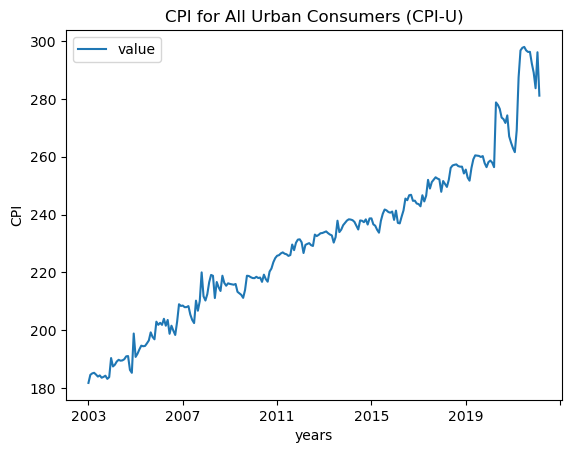

In [16]:
merged_dfc = merged_dfc.sort_values(by = 'year', ascending= True)
merged_dfc.plot(x = 'year', y = 'value')
plt.xlabel('years')
plt.ylabel('CPI')
plt.title('CPI for All Urban Consumers (CPI-U)')